This notebook demonstrates the GenericModel class.

This class takes a configuration object, which defines a model in terms of its parameters, states, control variables, and initial values.

Then it simulates the model.

It can take any decision rule for the control variables.
A key element of the design is that it uses the argument names of the transition and decision rules to identify which model variables to use as inputs.

In this way, even though the model configuration is written in Python, it feels more like what mathematical modelers are used to.

In [9]:
from HARK.distribution import Lognormal
import matplotlib.pyplot as plt
from HARK.simulation import GenericModel


from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType

We can use a decision rule derived from a HARK model.

In [10]:
solver_model = IndShockConsumerType()
solver_model.solve()

def first_solution(m):
    ### This is way more complicated than it should be...
    return solver_model.solution[0].cFunc(m).tolist()

In [3]:
first_solution(50)

26.066165198470504

The configuration object is a dictionary of dictionaries.

Exogenous shocks can be included as a parameter with a Distirbution value.
This distribution will be sample from as appropriate during simulation.

For 'states' that are used in the transition between time periods, provide a 'transition rule' for the variables in a 'post_states' dictionary. Then provide 'initial_values' for their value at the start of a simulation.

Here the trailing underscoe '\*\_' is used to represent the fac that the variable is "decremented" in time.

I.e., we can read 'a' as $a_t$ and 'a_' as $a_{t-1}$. This notation is subject to change based on standardization with the Dolo project.

In [4]:
#####
# A Sample Configuration
#####
sample_configuration = {
    'params' : {
        'G' : Lognormal(), # income growth SHOCK 
        # problem: this distribution updates its random seed each draw, so acts like a constant
        #          will be fixed with #619
        'R' : 1.01  # rate of return
    },
    'states' : {
        'b' : lambda a_, R: a_ * R,
        'm' : lambda p_, b : p_ + b, # within-period assets
    },
    'controls' : {
        'c' : first_solution # consumption.
        # The function is the decision rule.
    },
    'post_states' : {
        'a' : lambda m, c : m - c, #market assets
        'p' : lambda p_, G: p_ * G # income
    },
    'initial_states' : {
        'p_' : 1,
        'a_' : 1
    }
}

The GenericModel is used just like the other HARK AgentTypes with respect to how simulations are simulated and ran.

In [5]:
generic_model_test = GenericModel(sample_configuration)
generic_model_test.initializeSim()
generic_model_test.simulate()

History is available for the simulated values. All the model variables are tracked.

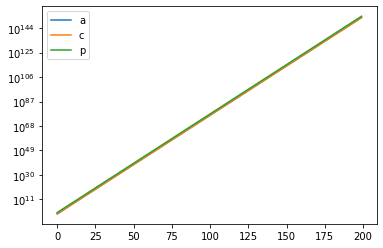

In [6]:
plt.plot(generic_model_test.agent.history['a'], label='a')
plt.plot(generic_model_test.agent.history['c'], label='c')
plt.plot(generic_model_test.agent.history['p'], label='p')
plt.yscale('log')
plt.legend()


Things looks quite different on the linear scale. Our model is not very realistic!

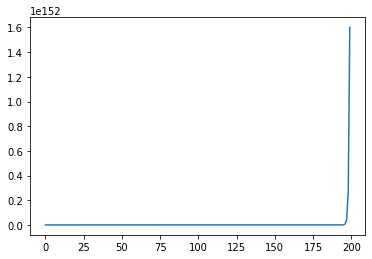

In [7]:
plt.plot(generic_model_test.agent.history['c'])

In [8]:
## Note the explosive 'G' here.
generic_model_test.agent.states 

{'p_': 1.673554764132766e+153,
 'a_': 1.5308097993575494e+152,
 'G': 5.836039190663969,
 'R': 1.01,
 'b': 2.64925893545143e+151,
 'm': 3.1325467395634253e+152}